In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

###installation of packages

In [2]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

##pre - processing and EDA

In [3]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [5]:
#sorting according to outcome
df = df.sort_values('Outcome')
df.head()
#seperating 0 and 1 values, so that i can handle 0 values of them seperatley
grouped = df.groupby(df.Outcome)
dfzero = grouped.get_group(0)
dfone =grouped.get_group(1)
dfone.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
746,1,147,94,41,0,49.3,0.358,27,1
618,9,112,82,24,0,28.2,1.282,50,1
13,1,189,60,23,846,30.1,0.398,59,1
619,0,119,0,0,0,32.4,0.141,24,1
701,6,125,78,31,0,27.6,0.565,49,1


In [6]:
#replacing with median for 1 values
dfone['Pregnancies']=dfone['Pregnancies'].replace(0,dfone['Pregnancies'].median())
dfone['Glucose']=dfone['Glucose'].replace(0,dfone['Glucose'].median())
dfone['BloodPressure']=dfone['BloodPressure'].replace(0,dfone['BloodPressure'].median())
dfone['SkinThickness']=dfone['SkinThickness'].replace(0,dfone['SkinThickness'].median())
dfone['Insulin']=dfone['Insulin'].replace(0,dfone['Insulin'].mean())
dfone['BMI']=dfone['BMI'].replace(0,dfone['BMI'].median())
#replacing with median for 0 values
dfzero['Pregnancies']=dfzero['Pregnancies'].replace(0,dfzero['Pregnancies'].median())
dfzero['Glucose']=dfzero['Glucose'].replace(0,dfzero['Glucose'].median())
dfzero['BloodPressure']=dfzero['BloodPressure'].replace(0,dfzero['BloodPressure'].median())
dfzero['SkinThickness']=dfzero['SkinThickness'].replace(0,dfzero['SkinThickness'].median())
dfzero['Insulin']=dfzero['Insulin'].replace(0,dfzero['Insulin'].mean())
dfzero['BMI']=dfzero['BMI'].replace(0,dfzero['BMI'].median())
df = pd.concat([dfzero,dfone])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90,62,18,59.0,25.1,1.268,25,0
465,2,124,56,13,105.0,21.8,0.452,21,0
466,2,74,52,10,36.0,27.8,0.269,22,0
467,2,97,64,36,100.0,36.8,0.600,25,0
469,6,154,78,41,140.0,46.1,0.571,27,0


In [7]:
(df == 0).sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


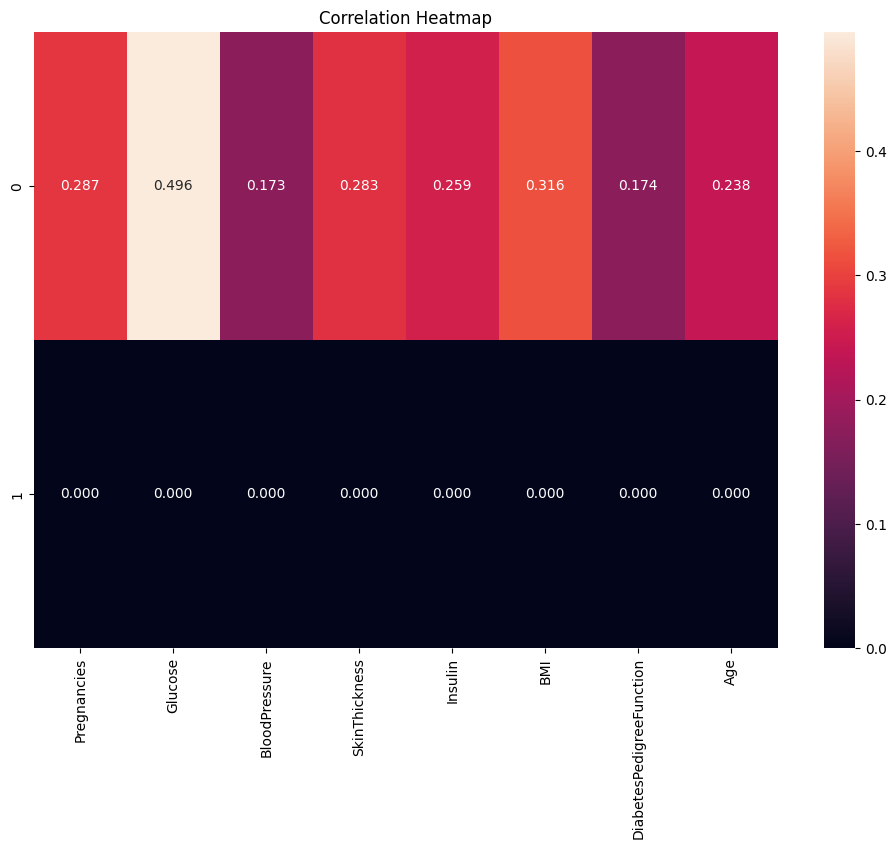

In [8]:
#point biserial heatmap
x = df.iloc[:,:-1]
y = df['Outcome']
corrvals = x.corrwith(y.astype('float'), method=stats.pointbiserialr)
plt.figure(figsize=(12, 8))
sns.heatmap(corrvals, annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()


Point-biserial correlation is used to measure the relationship between a binary variable and a continuous variable. It is a special case of Pearson correlation where one variable is dichotomous.

in the above heatmap, we see that for the outcome 1, only 2 features are related, blood pressur and skin thickness.

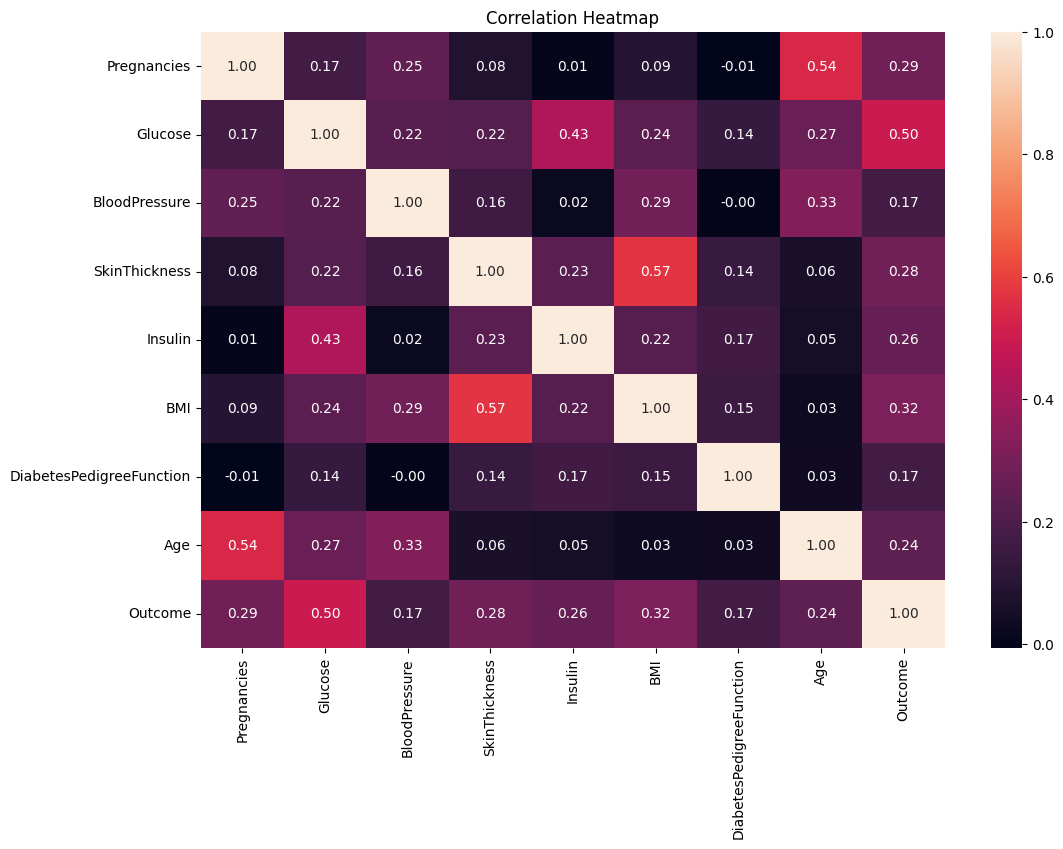

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
fig = px.scatter(df,x = "BMI", y = "SkinThickness", title = "BMI vs skin thickness", template = "plotly_dark", color = "Outcome")
fig.show()

In [11]:
fig = px.scatter(df,x = "Glucose", y = "Insulin", title = "Glucose vs Insulin", template = "plotly_dark", color = "Outcome")
fig.show()

<Axes: xlabel='Pregnancies'>

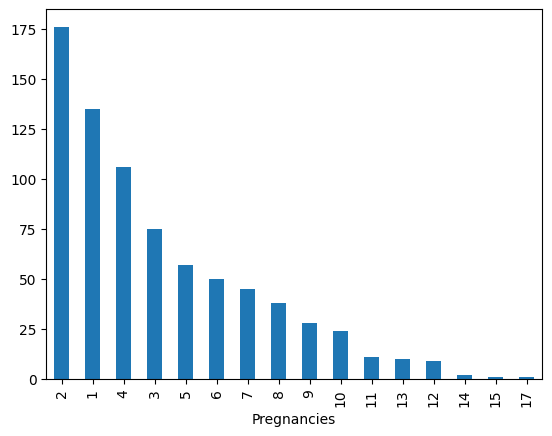

In [12]:
df['Pregnancies'].value_counts().plot.bar()

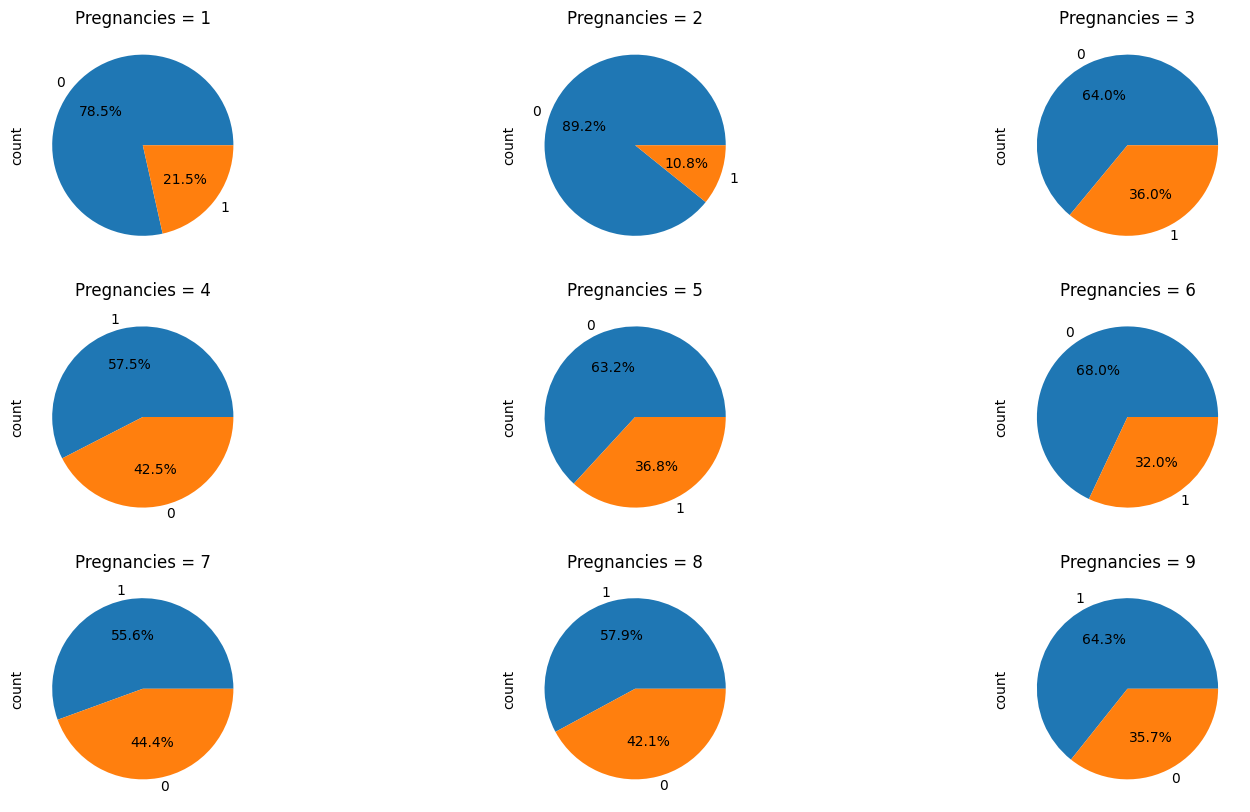

In [13]:
plt.figure(figsize=(18,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    df[df['Pregnancies']==i+1].Outcome.value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Pregnancies = {i+1}")


#classifications


##SVM

In [14]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,:-1]= scaler.fit_transform(df.iloc[:,:-1])
#scaled everything except target class
x = df.iloc[:,:-1]
y = df['Outcome']
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#svm
from sklearn import svm
clf = svm.SVC(kernel='linear')
#linear kernel
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
#predicted on test value after training
accu = clf.score(x_test,y_test)
print("accuracy of SVM : ", accu)
#accuracy of model


accuracy of SVM :  0.7857142857142857


##KNN

Text(0, 0.5, 'Error Rate')

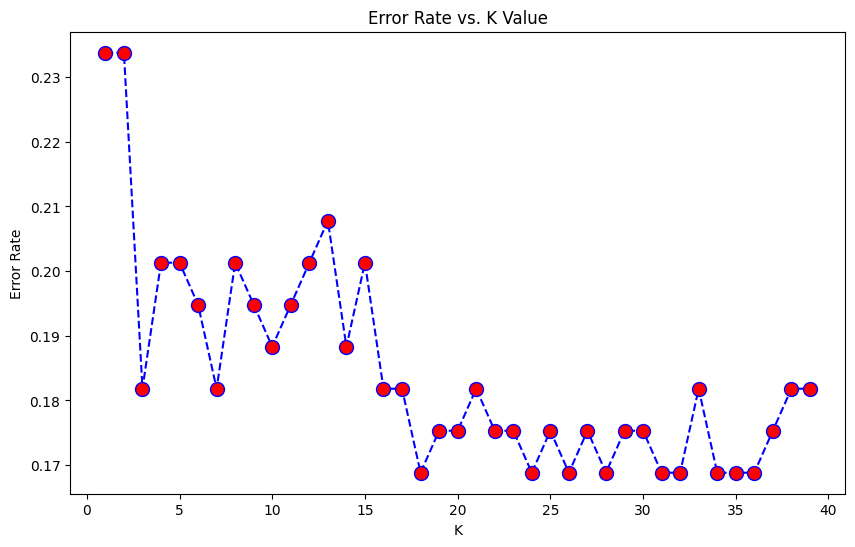

In [15]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error_rate = []
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

choosing k = 35

WITH K=35


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       104
           1       0.82      0.62      0.70        50

    accuracy                           0.83       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.83      0.82       154



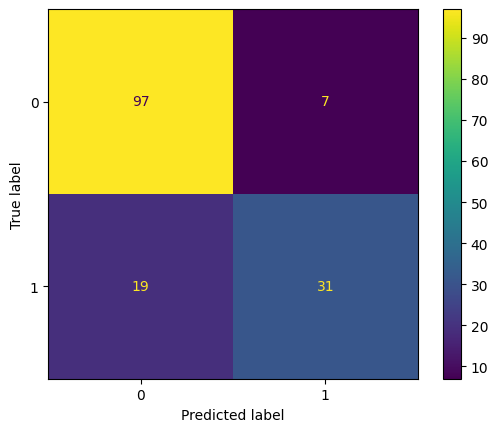

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=35, weights = 'uniform')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:, 1]
print('WITH K=35')
print('\n')
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

accuracy = 83.
therefore knn is better than SVM. But still the amount of false negatives is too much, and we have to reduce that.

to ensure better handling of false positives and false negatives, we try lowering the threshold line

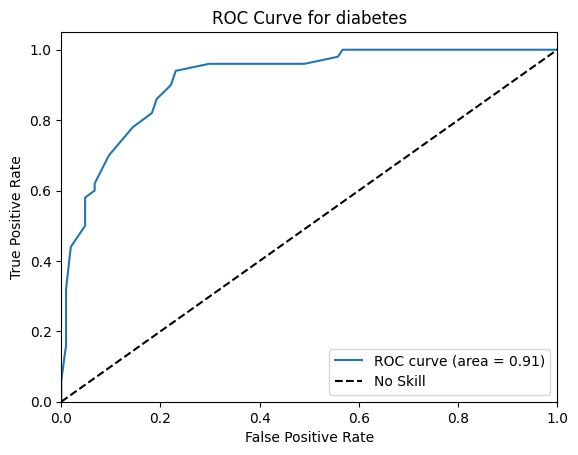

In [17]:
#
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for diabetes')
plt.legend()
plt.show()

from this graph, we will define threshold line somewhere around 0.3 - 0.4

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       104
           1       0.66      0.94      0.78        50

    accuracy                           0.82       154
   macro avg       0.81      0.85      0.82       154
weighted avg       0.87      0.82      0.83       154



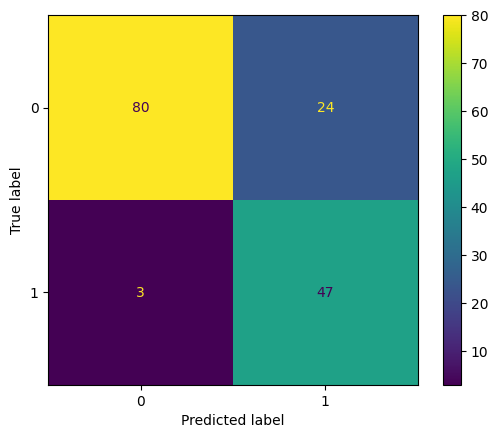

In [18]:
y_pred = (knn.predict_proba(x_test)[:,1] >= 0.32).astype(bool)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

successfully minimized false negatives in prediction.


##Random Forest

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       104
           1       0.78      0.86      0.82        50

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.88      0.88      0.88       154



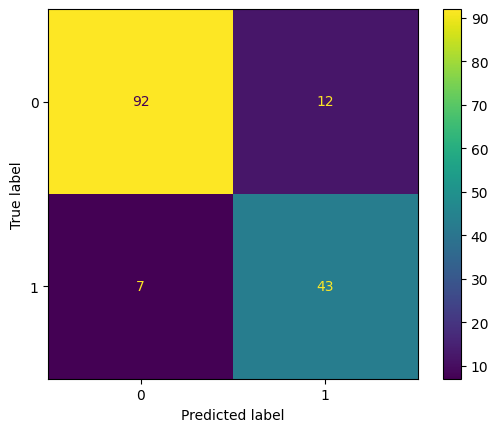

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

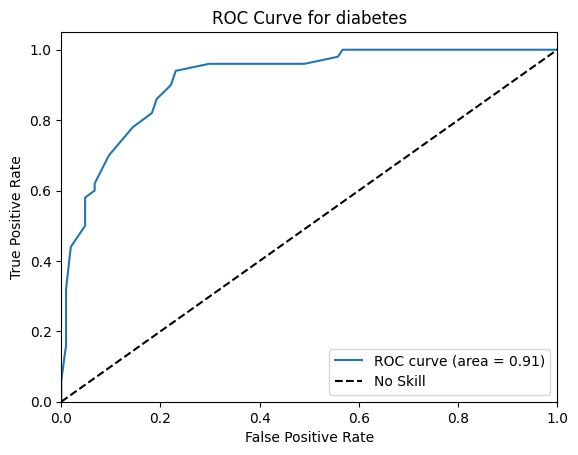

In [20]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for diabetes')
plt.legend()
plt.show()

from above curve, we select thresh hold value from somewhere around 0.3-0.4

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       104
           1       0.74      0.96      0.83        50

    accuracy                           0.88       154
   macro avg       0.86      0.90      0.87       154
weighted avg       0.90      0.88      0.88       154



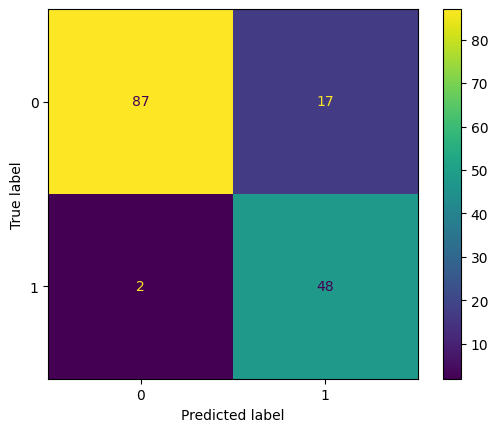

In [21]:
y_pred = (rfc.predict_proba(x_test)[:,1] >= 0.37).astype(bool)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

##building demo using gradio

In [22]:
import gradio as gr
def classify_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  input_data = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]).reshape(1, -1)

  prediction =(rfc.predict_proba(input_data)[:,1] >= 0.37).astype(bool)
  return prediction
#making gradio interface
iface = gr.Interface(
 fn=classify_diabetes,
 inputs= [
    gr.Number(label="Pregnancies"),
    gr.Number(label="Glucose"),
    gr.Number(label="BloodPressure"),
    gr.Number(label="SkinThickness"),
    gr.Number(label="Insulin"),
    gr.Number(label="BMI"),
    gr.Number(label="DiabetesPedigreeFunction"),
    gr.Number(label="Age")
],
 outputs=gr.Number(),
 live=False,
 title="do you have diabetes?",
 description="Enter you information in given areas :"
)


iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://229996ee5c515f73d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#making test report

In [23]:
y_pred = pd.Series(y_pred, index=x_test.index, name='ypred')
dfnew = pd.concat([x_test, y_test.rename('ytest'), y_pred], axis=1)
dfnew.reset_index(drop=True, inplace = True)
dfnew.head()
dfnew.to_csv('diabetes classification report.csv', header=True, index = True)